# Parte a y b

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def obtener_frecuencia(path, time1=10, rango=75):
    # Cargar los datos
    tabla = pd.read_csv(path, sep="\t", names=["tiempo", "posición"])
    # Filtrar los primeros 5 segundos
    tabla_5s = tabla[tabla["tiempo"] <= time1]

    # Gráfico de amplitud vs. tiempo (solo primeros 5 segundos)
    plt.figure(figsize=(10, 5))
    """plt.title(f"Gráfico posición vs tiempo (Primeros {time1} segundos)")"""
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Posición")
    plt.plot(tabla_5s["tiempo"], tabla_5s["posición"], color="tab:blue")
    plt.legend()
    plt.show()

    # Transformada de Fourier
    # Definir la señal y la frecuencia de muestreo para los primeros 5 segundos
    signal = tabla_5s["posición"].values
    time = tabla_5s["tiempo"].values
    sampling_rate = 1 / np.mean(np.diff(time))  # Calcular la frecuencia de muestreo
    

    # Aplicar la transformada de Fourier
    fft_values = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    # Graficar la amplitud en función de la frecuencia, incluyendo la parte negativa
    plt.figure(figsize=(10, 5))
    """plt.title("Transformada de Fourier completa de la señal (Primeros 10 segundos)")"""
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq, np.abs(fft_values))  # Muestra la transformada completa
    plt.show()

    # Gráfico de transformada de Fourier en el rango de -100 a +100 Hz
    # Seleccionar solo el rango deseado
    mask = (fft_freq >= -rango) & (fft_freq <= rango)
    fft_freq_rango = fft_freq[mask]
    fft_values_rango = np.abs(fft_values[mask])

    # Encontrar los picos en el espectro de Fourier
    peaks, properties = find_peaks(fft_values_rango, height=0)

    # Obtener las frecuencias y amplitudes correspondientes a los picos
    frecuencias_peaks = fft_freq_rango[peaks]
    amplitudes_peaks = fft_values_rango[peaks]

    # Seleccionar los dos picos de mayor amplitud
    indices_top2 = np.argsort(amplitudes_peaks)[-2:]  # Obtener los índices de los 2 picos más altos
    frecuencias_top2 = frecuencias_peaks[indices_top2]
    amplitudes_top2 = amplitudes_peaks[indices_top2]

    # Imprimir los dos picos de mayor amplitud
    for f, a in zip(frecuencias_top2, amplitudes_top2):
        print(f"Frecuencia pico: {f:.2f} Hz, Amplitud: {a:.2f}")

    # Graficar el espectro con los dos picos de mayor amplitud
    plt.figure(figsize=(10, 5))
    """plt.title(f"Transformada de Fourier (rango de -{rango} a +{rango} Hz)  ({time1} segundos)")"""
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    plt.plot(fft_freq_rango, fft_values_rango, label="Espectro de Fourier")
    leyenda_picos = ', '.join([f"{f:.2f} Hz" for f in frecuencias_top2])
    plt.plot((frecuencias_top2),(amplitudes_top2), "rx", label=f"Amplitud frecuencia dominante ({frecuencias_top2[0]:.3f}Hz)")
    # Crear la tabla con los picos

    plt.legend()
    plt.show()

# Ejemplo de uso
# obtener_frecuencia(r"C:\ruta\a\tu\archivo\DataRecor2.csv", 5)


## Data 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


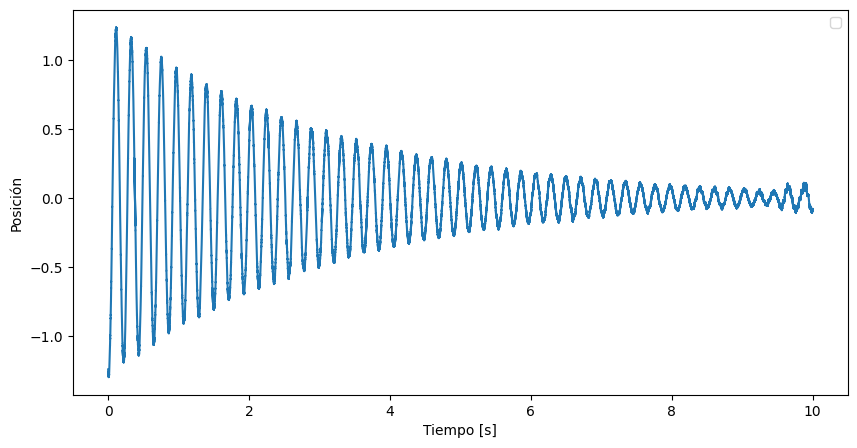

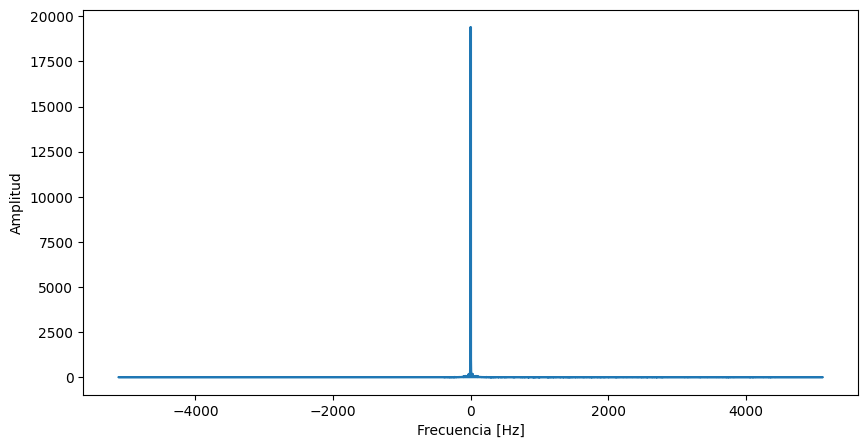

Frecuencia pico: -4.70 Hz, Amplitud: 19397.34
Frecuencia pico: 4.70 Hz, Amplitud: 19397.34


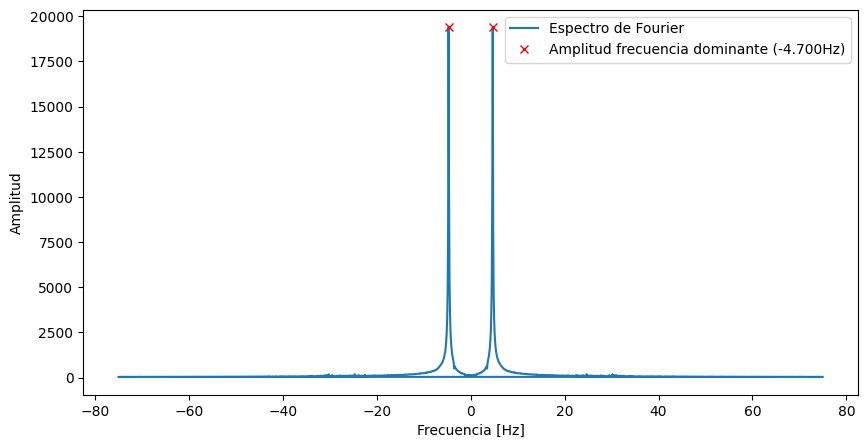

In [4]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-58-18)\DataRecor2.csv")

## Para muestreo de 1280 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


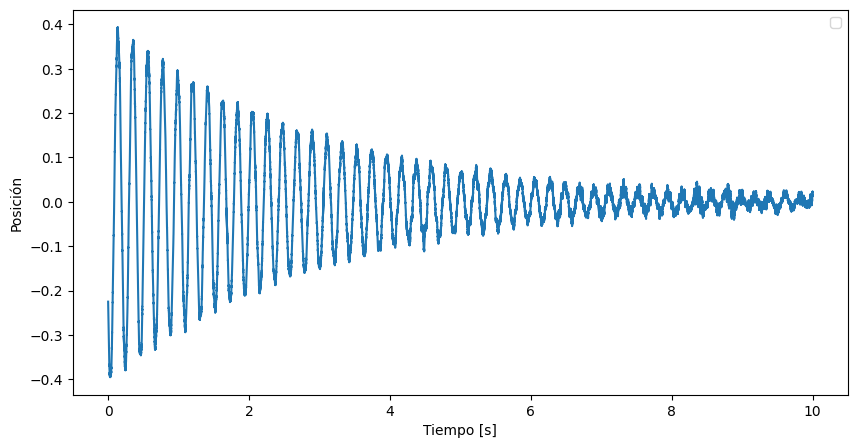

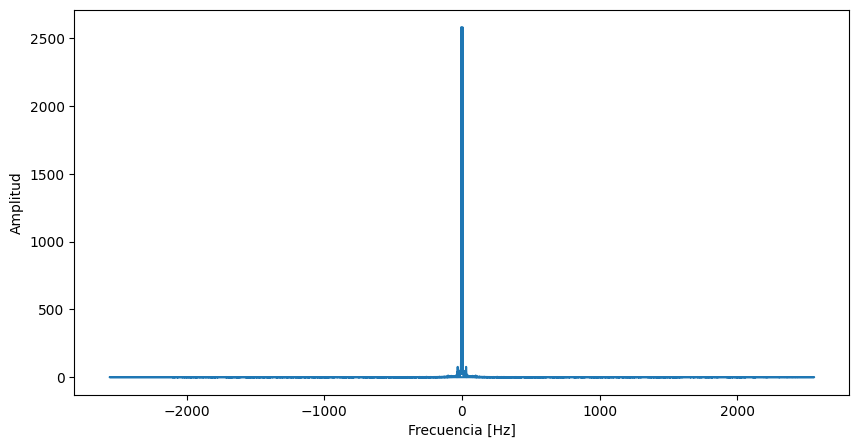

Frecuencia pico: 4.70 Hz, Amplitud: 2580.72
Frecuencia pico: -4.70 Hz, Amplitud: 2580.72


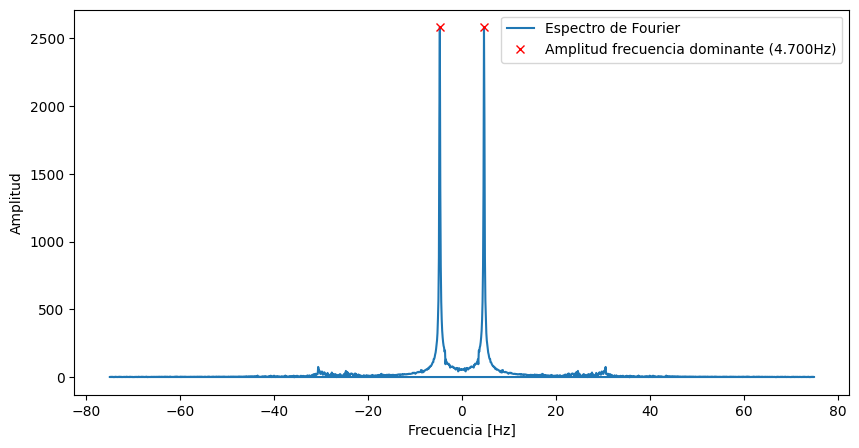

In [5]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-02)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-02)\DataRecor2.csv")

## Para muestreo de 2560 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


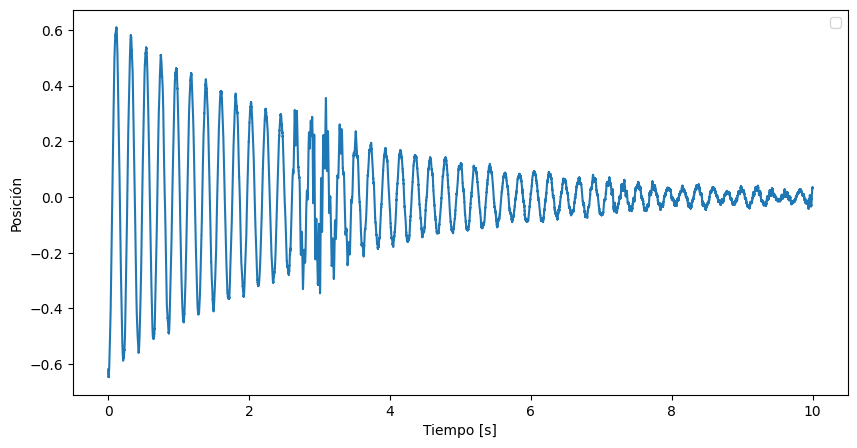

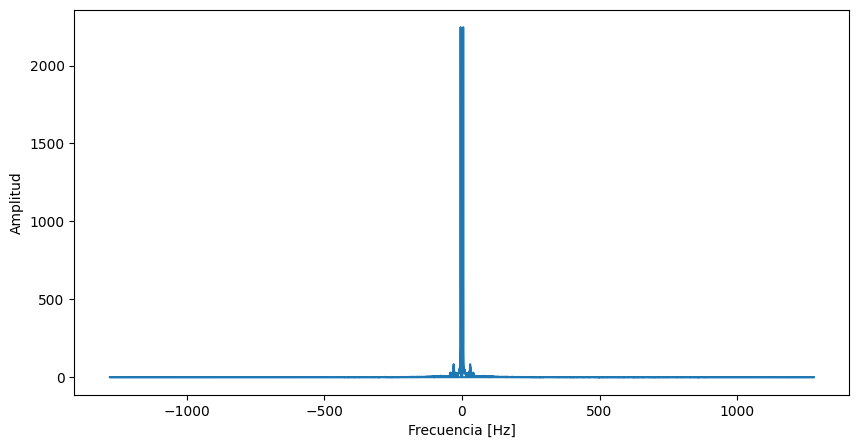

Frecuencia pico: -4.70 Hz, Amplitud: 2245.83
Frecuencia pico: 4.70 Hz, Amplitud: 2245.83


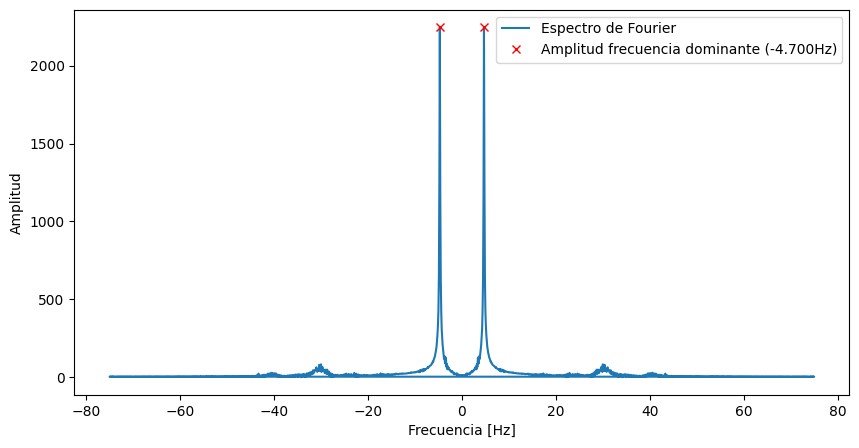

In [6]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-33)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,15-59-33)\DataRecor2.csv")

## Para muestreo de 5120 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


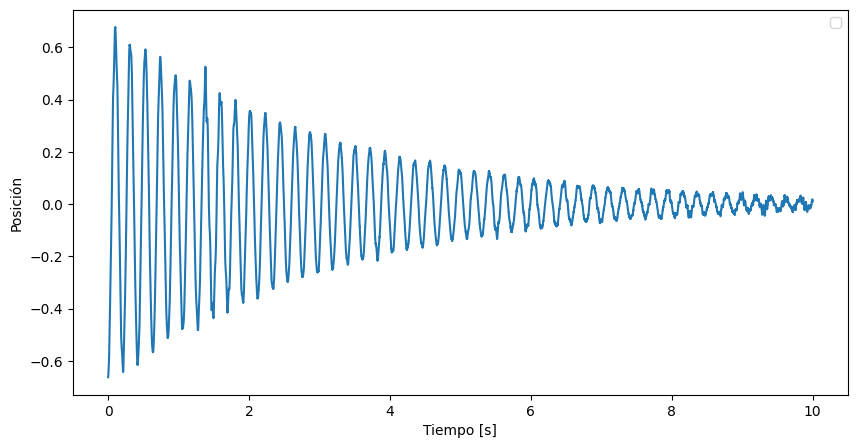

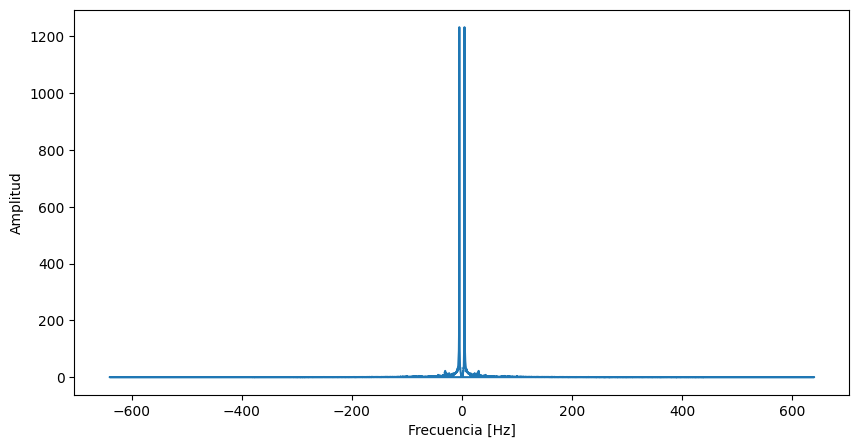

Frecuencia pico: -4.70 Hz, Amplitud: 1232.14
Frecuencia pico: 4.70 Hz, Amplitud: 1232.14


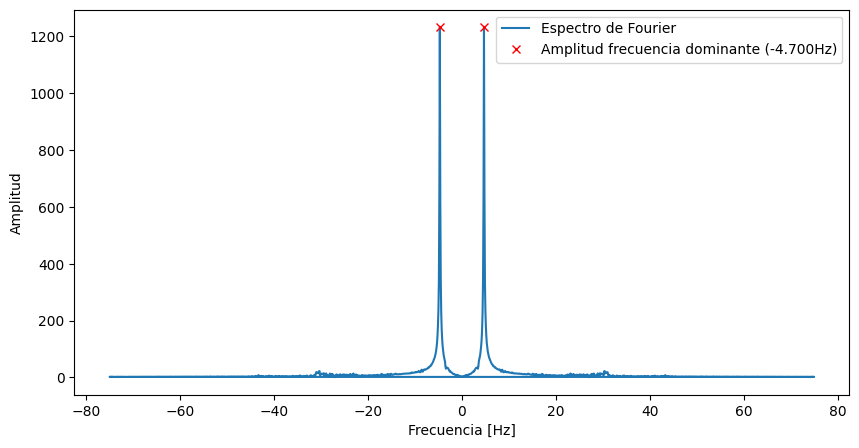

In [7]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-10)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-10)\DataRecor2.csv")

## Para muestreo de 10240 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


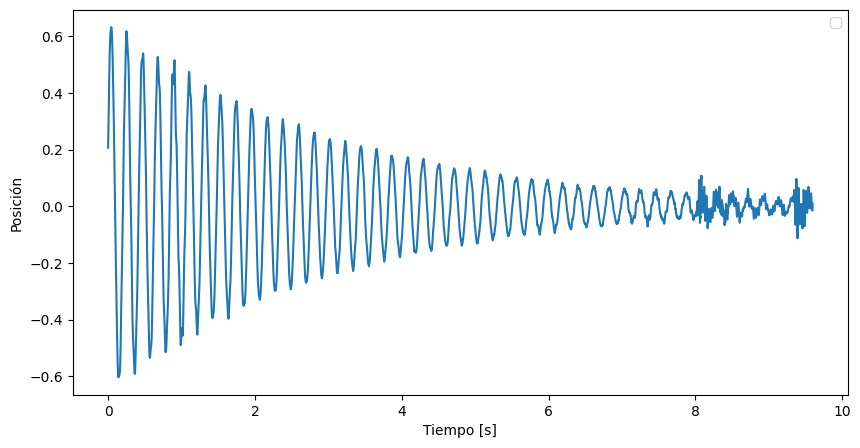

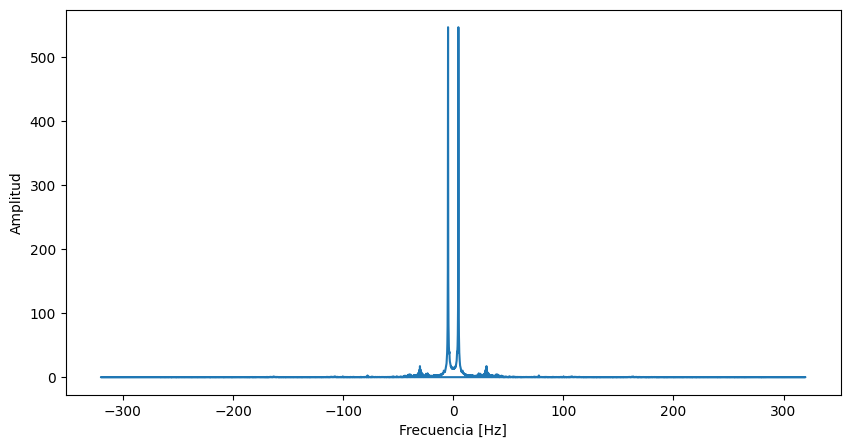

Frecuencia pico: 4.69 Hz, Amplitud: 546.84
Frecuencia pico: -4.69 Hz, Amplitud: 546.84


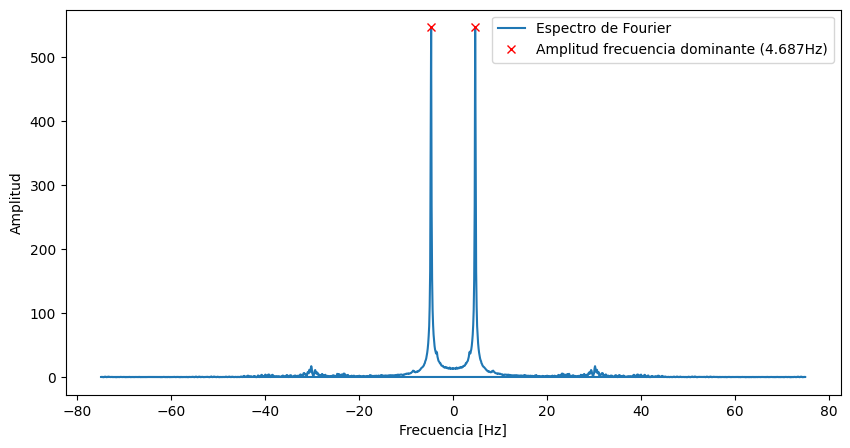

In [8]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")

# PArte c FORZADOS

De estos, en 4 casos se utilizaron frecuencias de forzamiento inferiores al intervalo de seguridad
(3,25 [Hz], 4 [Hz], 4,3 [Hz] y 4,5 [Hz]) mientras que en los otros 4 casos se utilizaron frecuencias de
forzamiento superiores a dicho intervalo (5,5 [Hz], 5,7 [Hz], 6 [Hz] y 6,75 [Hz]).

## Forzamiento 1: 3,25 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


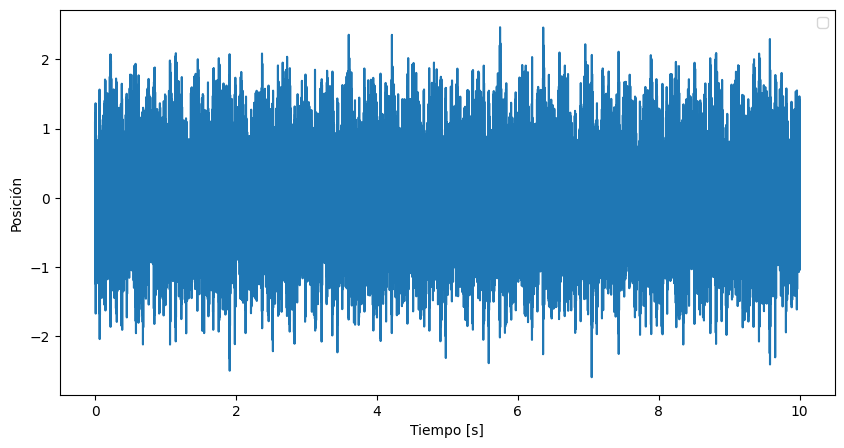

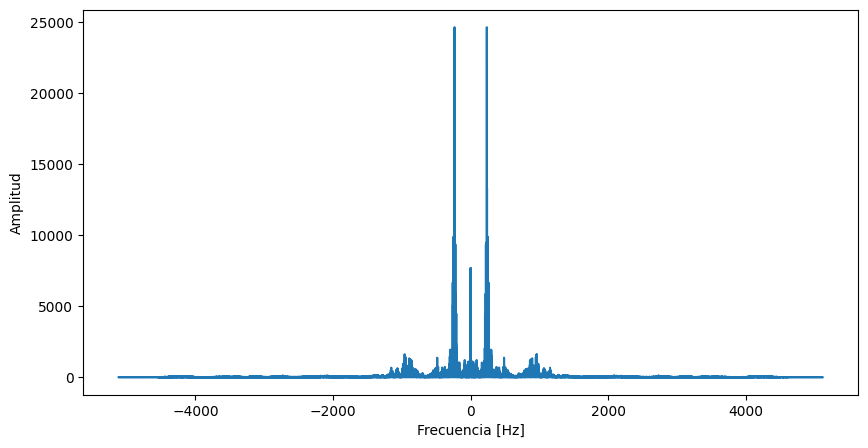

Frecuencia pico: 3.30 Hz, Amplitud: 7679.28
Frecuencia pico: -3.30 Hz, Amplitud: 7679.28


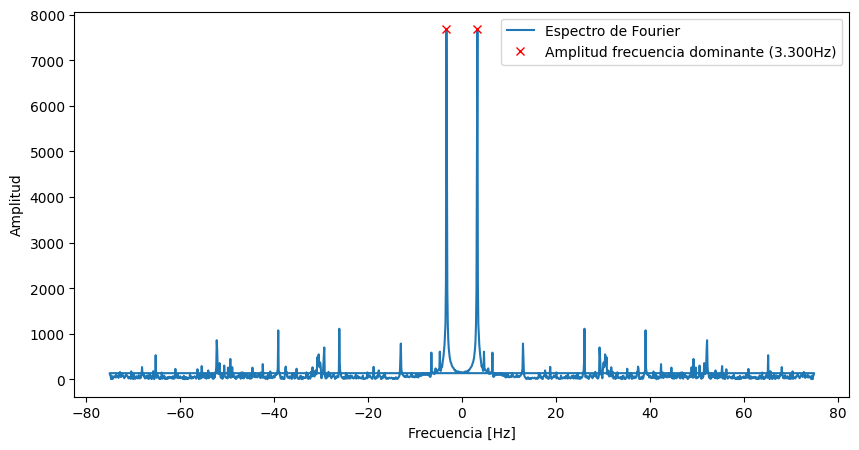

In [9]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-33-58)\DataRecor2.csv")

## Forzamiento 2 :4 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


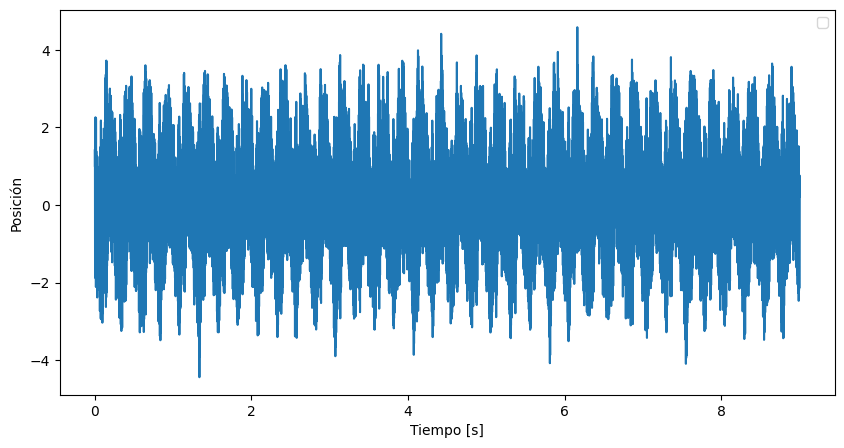

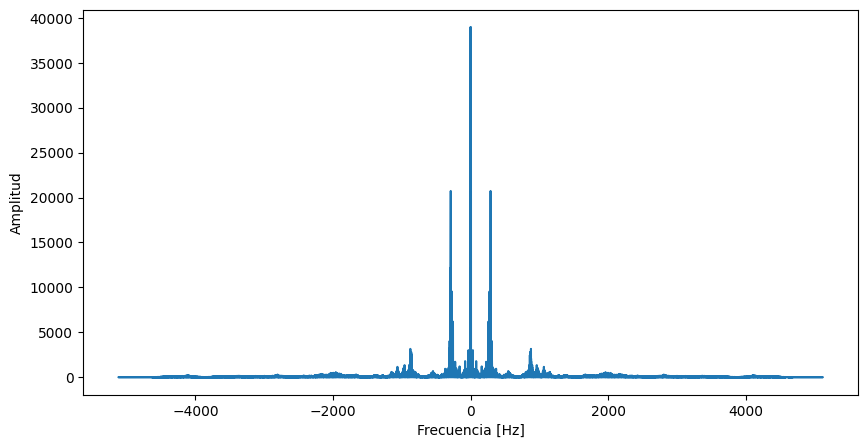

Frecuencia pico: 4.00 Hz, Amplitud: 38955.83
Frecuencia pico: -4.00 Hz, Amplitud: 38955.83


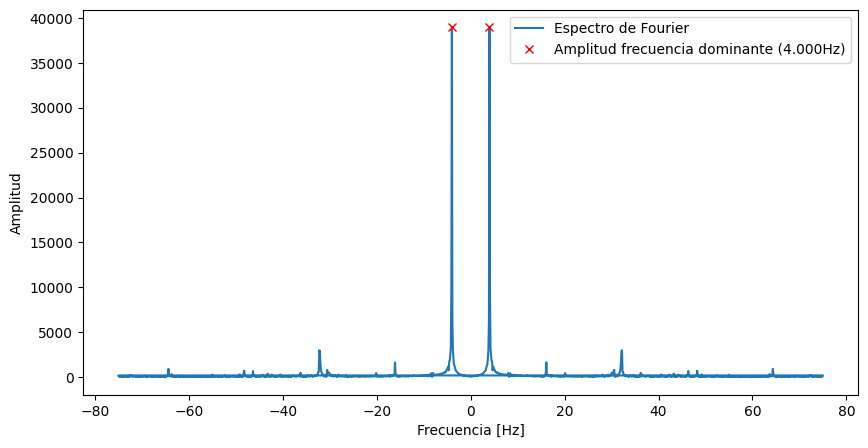

In [10]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-35-08)\DataRecor2.csv")

## Forzamiento 3: 4,3 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


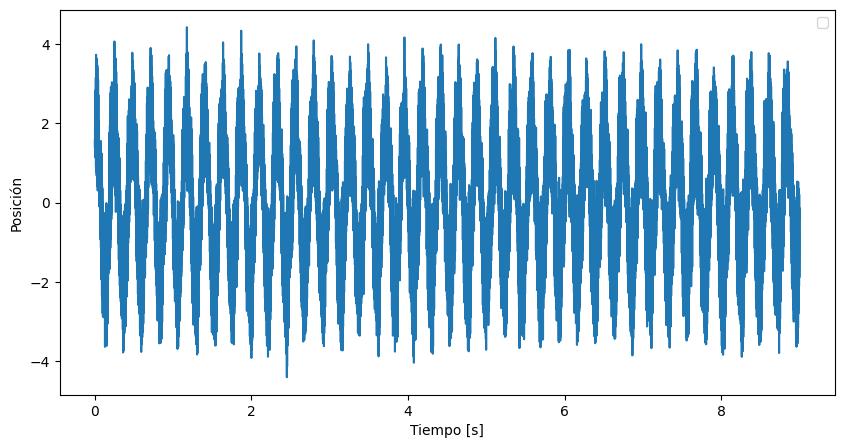

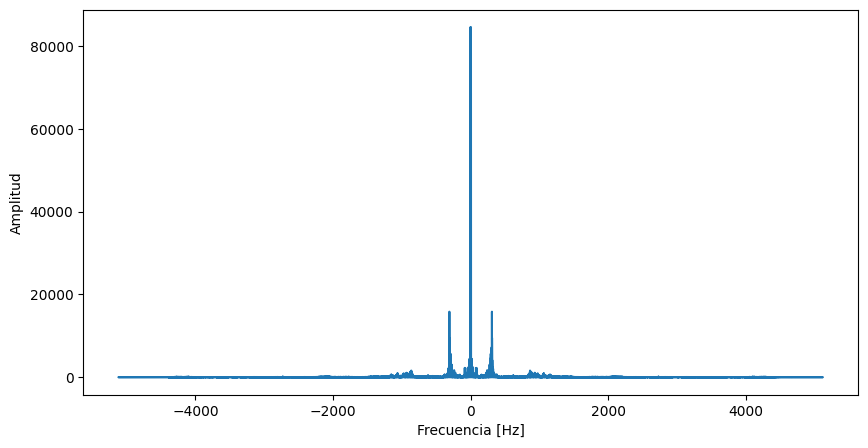

Frecuencia pico: 4.33 Hz, Amplitud: 84533.39
Frecuencia pico: -4.33 Hz, Amplitud: 84533.39


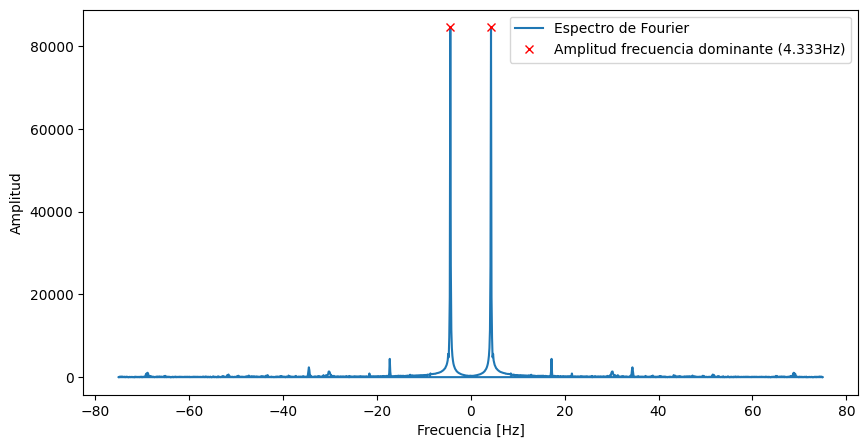

In [11]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-36-32)\DataRecor2.csv")

## Forzamiento 4: 4,5 [Hz])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


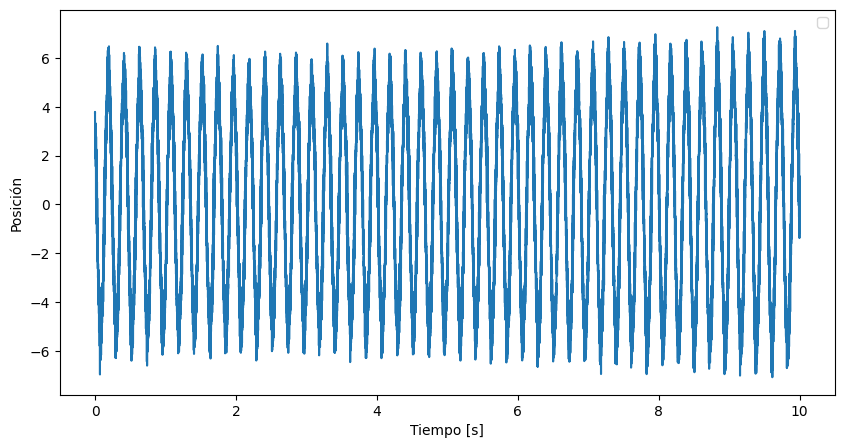

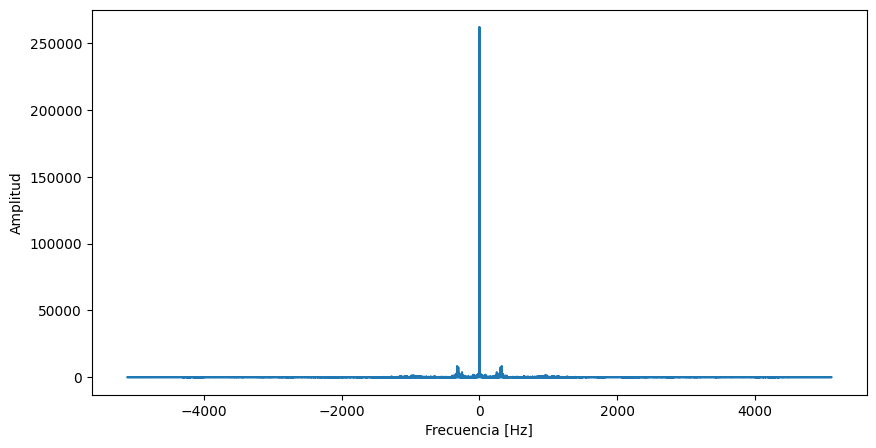

Frecuencia pico: 4.50 Hz, Amplitud: 261878.35
Frecuencia pico: -4.50 Hz, Amplitud: 261878.35


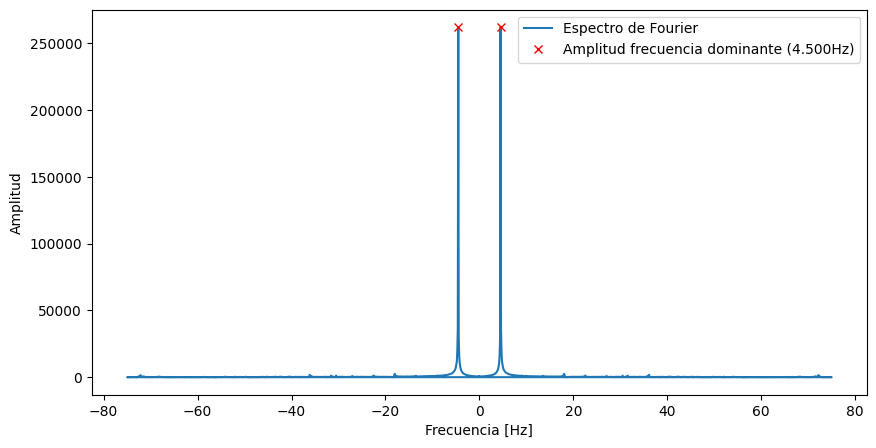

In [12]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-37-18)\DataRecor2.csv")

## forzamiento 5 :5,5 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


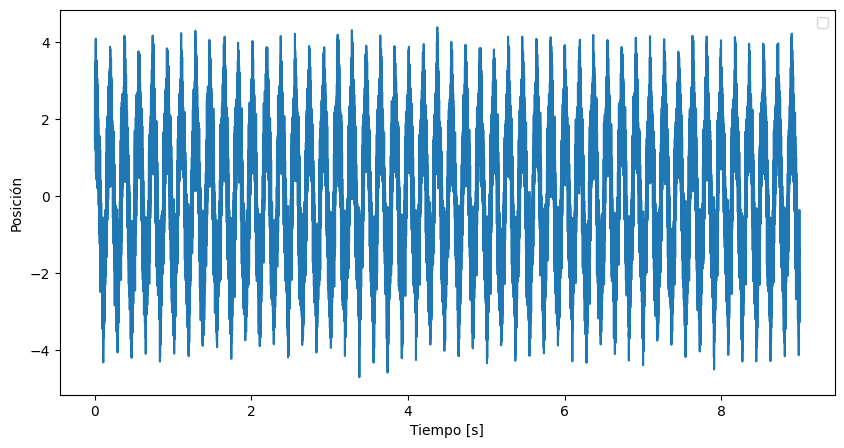

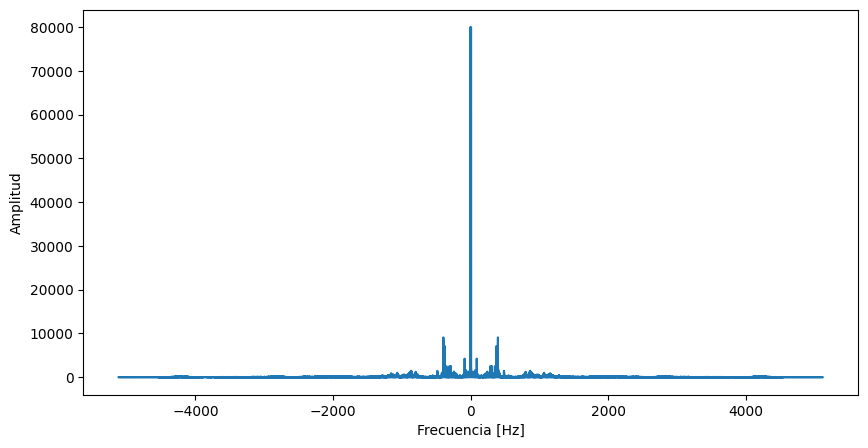

Frecuencia pico: 5.56 Hz, Amplitud: 79976.21
Frecuencia pico: -5.56 Hz, Amplitud: 79976.21


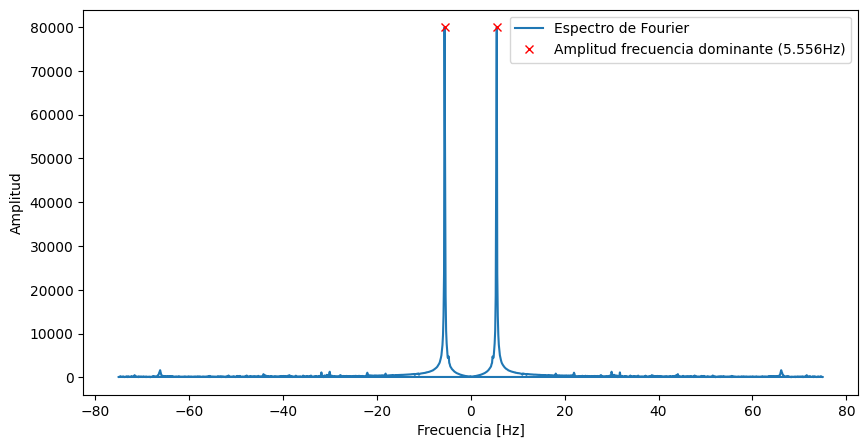

In [13]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-38-41)\DataRecor2.csv")

## Forzamiento 6 :5,7 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


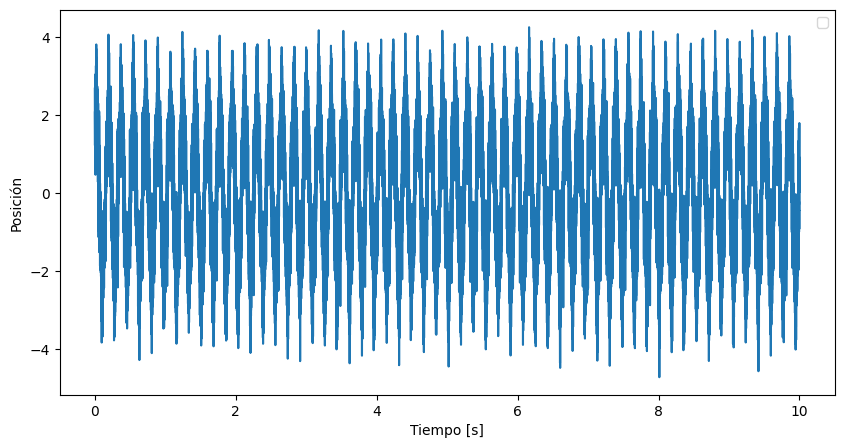

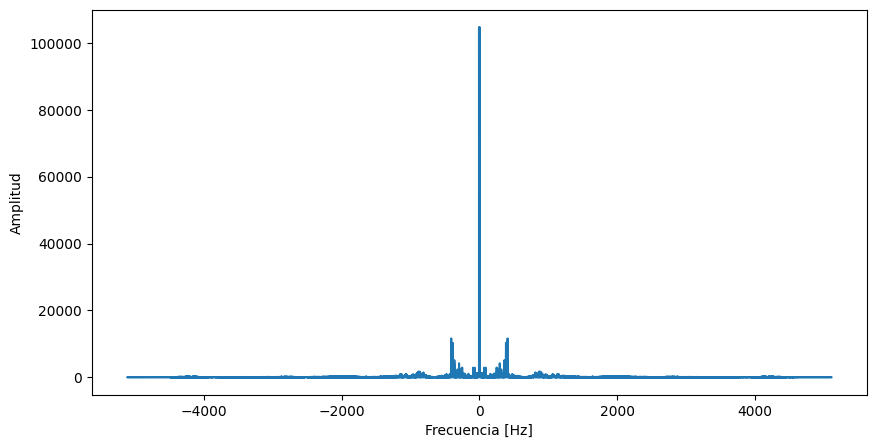

Frecuencia pico: -5.70 Hz, Amplitud: 104731.79
Frecuencia pico: 5.70 Hz, Amplitud: 104731.79


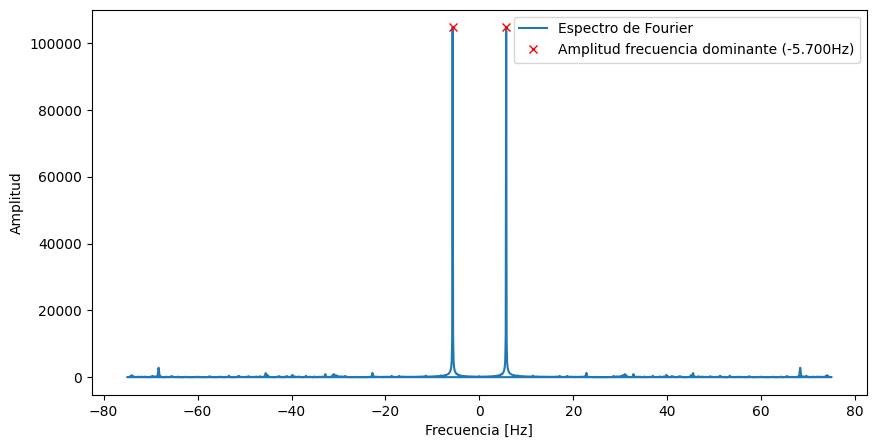

In [14]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-39-58)\DataRecor2.csv")

## forzamiento 7 :6 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


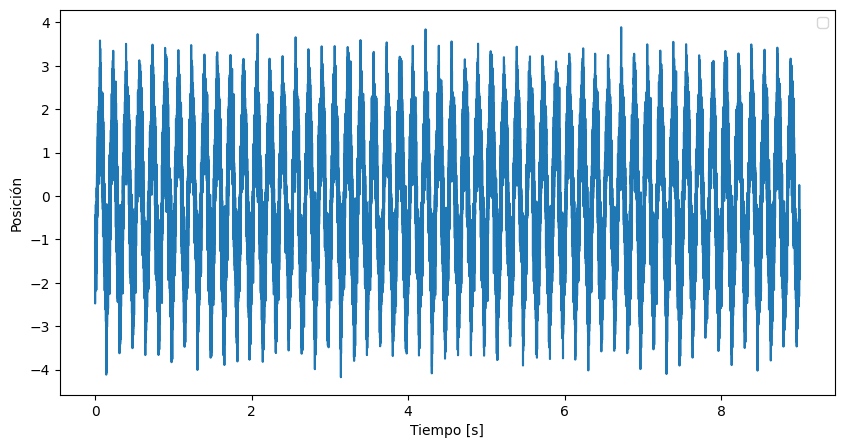

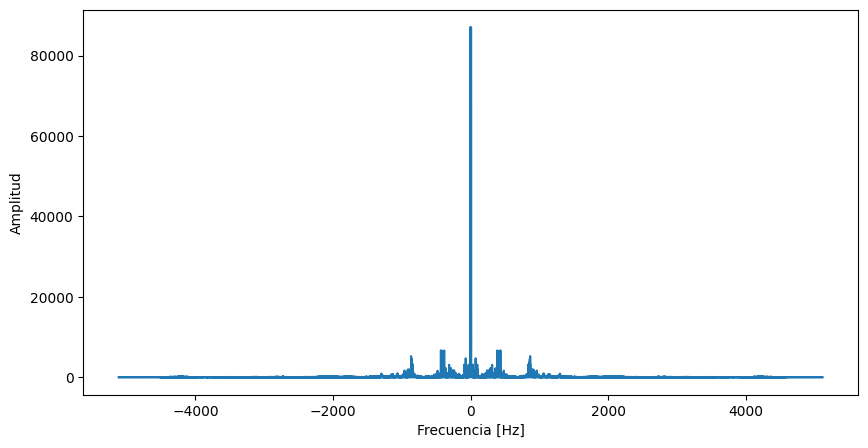

Frecuencia pico: -6.00 Hz, Amplitud: 87064.63
Frecuencia pico: 6.00 Hz, Amplitud: 87064.63


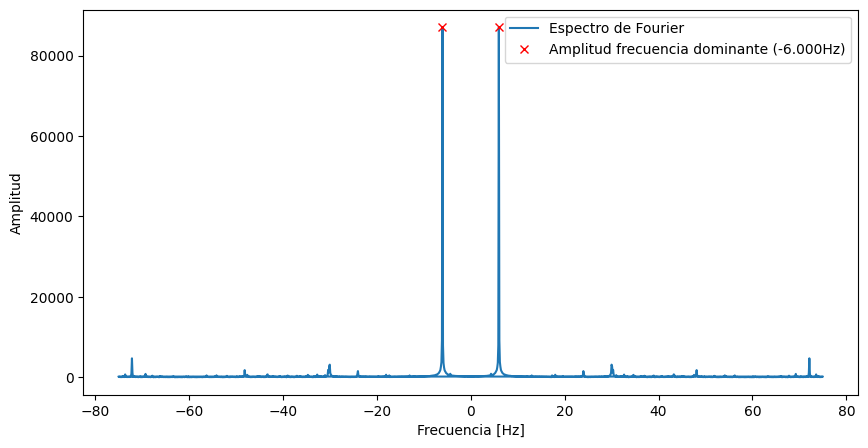

In [15]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-40-32)\DataRecor2.csv")

## forzamiento 8 :6,75 [Hz]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


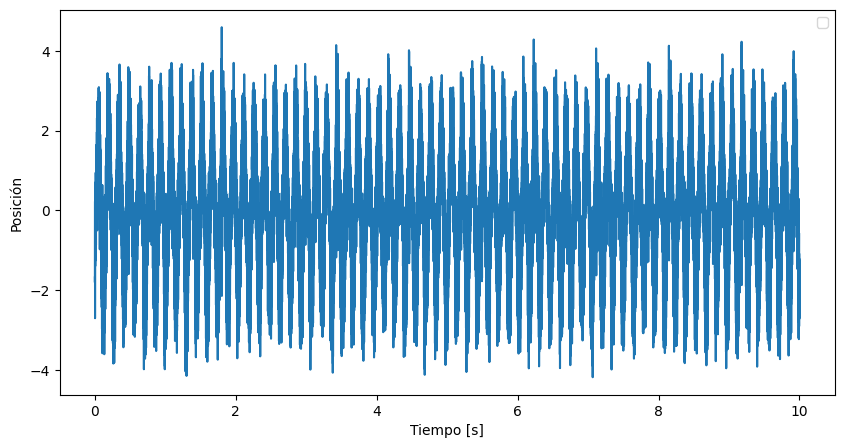

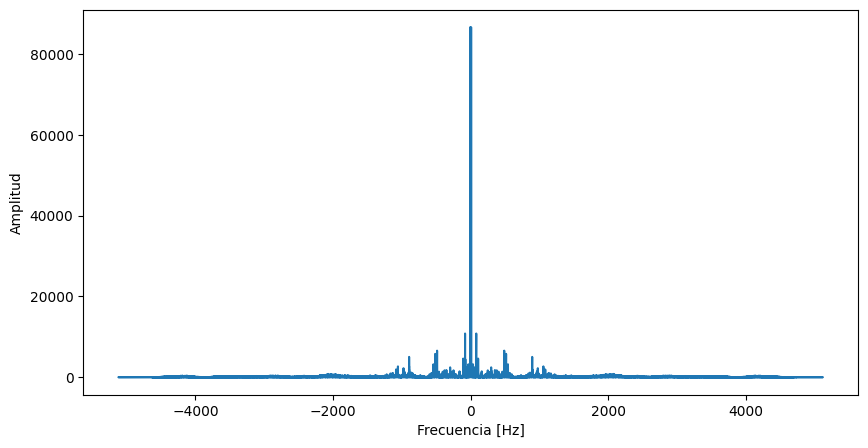

Frecuencia pico: -6.80 Hz, Amplitud: 86613.81
Frecuencia pico: 6.80 Hz, Amplitud: 86613.81


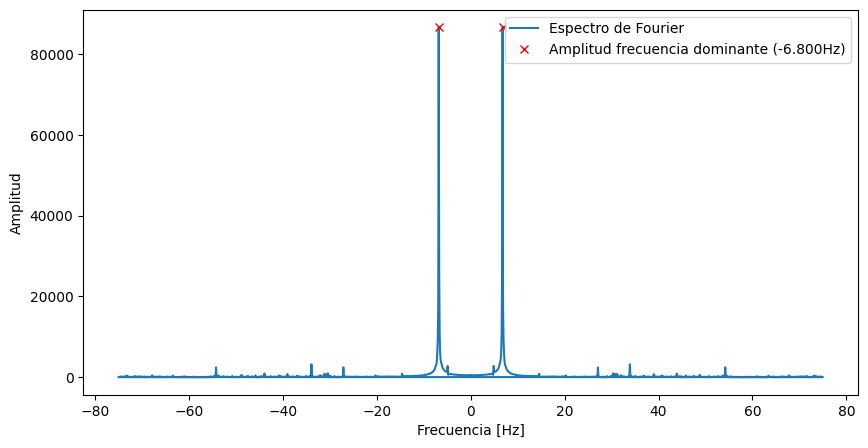

In [16]:
#obtener_frecuencia(r"C:\Users\chelo\Downloads\Vibras-Mec-nicas-main\Vibras-Mec-nicas-main\LAB 02\Mediciones limpias\Parte 1\Test(2024-10-10,16-00-54)\DataRecor2.csv")
obtener_frecuencia(r"LAB 02\Mediciones limpias\Parte 2\Test(2024-10-10,16-41-12)\DataRecor2.csv")

# Parte d

La raz´on X/δst para los distintos valores de r medidos y en el mismo gr´afico la soluci´on
anal´ıtica esperada. Para el c´alculo de la deflexi´on est´atica considere que la constante el´astica
del resorte es: k = 2.5 kN/m. Adem´as, el m´odulo de la fuerza producida por el desbalance
rotario (F0) se calcula como F0 = 2m0ω
2
r0, donde m0 = 28.08 g y r0 = 45 mm. La
velocidad de rotaci´on ω se mide en rad/s.

In [28]:
def X_div_delta_st(r_array, xi):
    analitico = 1 / np.sqrt( (1-r_array**2)**2  + (2*xi*r_array)**2 )
    return analitico

Estos valores de abajo os determinamos con el metod del chelo maybe??


In [29]:
arr_exp = np.linspace(0,5,100)
xi_exp = 0.011
#print(X_div_delta_st(arr, shi))



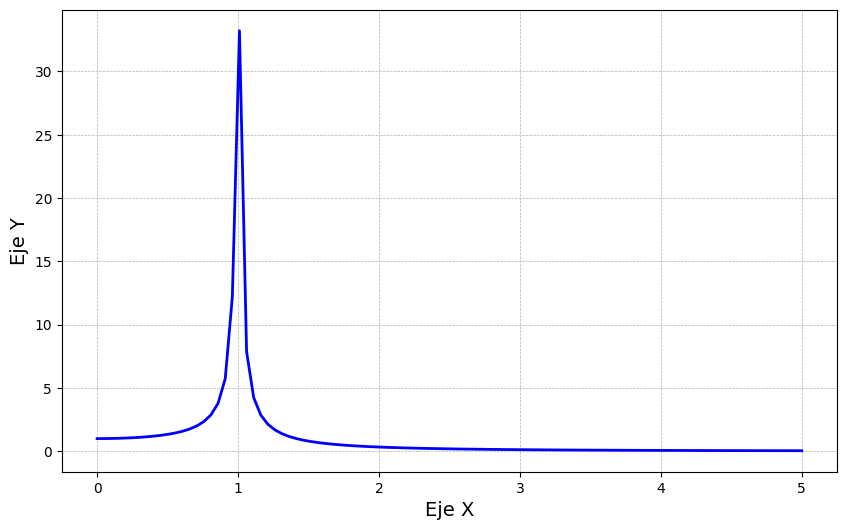

In [30]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))
# Plotear los datos
plt.plot(arr_exp, X_div_delta_st(r_array=arr_exp,xi=xi_exp), label='X/d', color='b', linewidth=2)
# Etiquetas de los ejes
plt.xlabel('Eje X', fontsize=14)
plt.ylabel('Eje Y', fontsize=14)
# Título del gráfico
# Leyenda
# Grid para mejor visualización
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Mostrar el gráfico
plt.show()

Analitico... 𝜁 =
𝑐
2𝑚𝜔𝑛
𝛿𝑠𝑡 =
𝐹0
𝑘
𝑟 =
𝜔
𝜔�

In [ ]:
m0 = 28.08/1000 # [kg]
r0 = 45 /1000 # [m]
w_array = 2*np.pi*np.array([3.25, 4, 4.3, 4.5, 5.5, 5.7, 6, 6.75])

k = 2.5 * 10**3 # [N/m]
F0 = 2 * m0 * w_array **2 * r0

delta_st = F0/k
X = 0.6 # maybe??

Xdivdelta = X/delta_st

w_natural = 29.651634463541193

r_array = w_natural /w_array



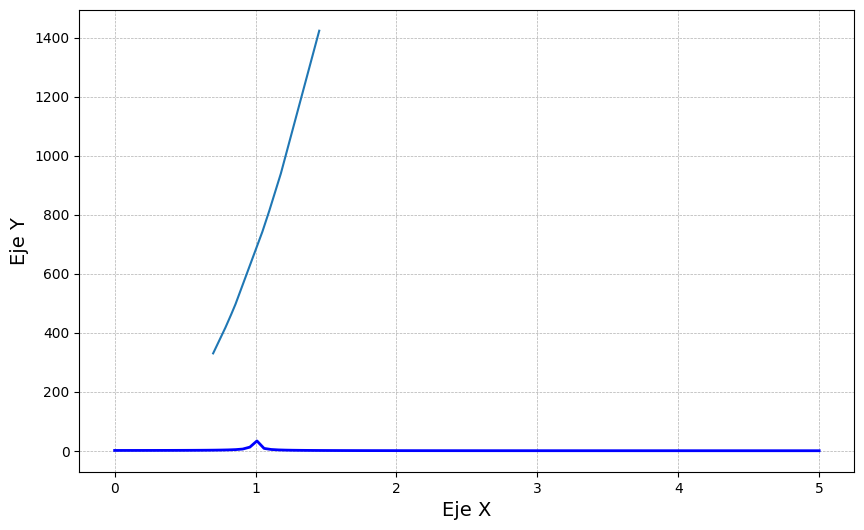

In [32]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))
# Plotear los datos
plt.plot(arr_exp, X_div_delta_st(r_array=arr_exp,xi=xi_exp), label='X/d', color='b', linewidth=2)
plt.plot(r_array, Xdivdelta)
# Etiquetas de los ejes
plt.xlabel('Eje X', fontsize=14)
plt.ylabel('Eje Y', fontsize=14)
# Título del gráfico
# Leyenda
# Grid para mejor visualización
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Mostrar el gráfico
plt.show()